In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
dat = pd.read_csv('./data/training_set_VU_DM.csv')

The dataset is really large right now. Let's first try to find some basic analytics with just some of the variables.

In [3]:
hotel_data = dat[['prop_id','price_usd','visitor_location_country_id','visitor_hist_starrating','visitor_hist_adr_usd', 'click_bool', 'booking_bool', 'gross_bookings_usd','srch_length_of_stay','srch_adults_count', 'srch_children_count']].sort_values('prop_id')
hotel_data = hotel_data[hotel_data['booking_bool'] != 0]
hotel_data['booking_p_night'] = hotel_data['gross_bookings_usd']/hotel_data['srch_length_of_stay']
hotel_data['booking_p_person'] = hotel_data['gross_bookings_usd']/(hotel_data['srch_children_count'] + hotel_data['srch_adults_count'])
hotel_data['booking_p_night_person'] = hotel_data['gross_bookings_usd']/hotel_data['srch_length_of_stay']/(hotel_data['srch_children_count'] + hotel_data['srch_adults_count'])

We made new variables to try compare the booking with the previous booking in the 'visitor_hist_adr_usd' variable. We first use Pearson's correlation test. 

In [4]:
hotel_data[['visitor_hist_adr_usd','booking_p_night','booking_p_person','booking_p_night_person']].corr()

,visitor_hist_adr_usd,booking_p_night,booking_p_person,booking_p_night_person
visitor_hist_adr_usd,1.000000,0.290151,0.109992,0.262573
booking_p_night,0.290151,1.000000,0.534495,0.836849
booking_p_person,0.109992,0.534495,1.000000,0.604983
booking_p_night_person,0.262573,0.836849,0.604983,1.000000


A convincing correlation cannot be found. This makes sense as we have no information about the previous booking, just the price per night. Based on that information, the booking_p_night variable should be the most comparible, but is barely better than the others. 

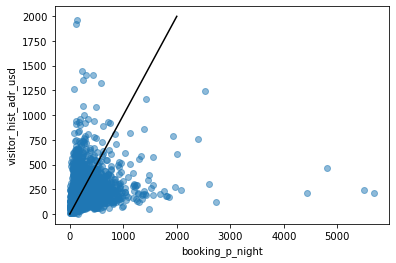

In [5]:
x = np.arange(0,2000)
y = np.arange(0,2000)
plt.scatter(hotel_data['booking_p_night'],hotel_data['visitor_hist_adr_usd'], alpha=0.5)
plt.plot(x,y, color = 'black')
plt.xlabel('booking_p_night')
plt.ylabel('visitor_hist_adr_usd')
plt.show()

This plot shows the same result, it is really hard to find some linear relation here. 

There are multiple type of hotels with multiple dimensions of data. We can try to perform a k-means clustering algorithm to cluster the hotels.

In [6]:
hotel_clustering = dat[['prop_country_id','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','price_usd','promotion_flag']].dropna()

The elbow method is a useful graphical tool to estimate the optimal number of clusters k for a given task. Intuitively, we can say that, if k increases, the within-cluster SSE (“distortion”) will decrease. This is because the samples will be closer to the centroids they are assigned to.
The idea behind the elbow method is to identify the value of k where the distortion begins to decrease most rapidly, which will become clearer if we plot the distortion for different values of k.
https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

1
2
3
4
5
6
7
8
9
10


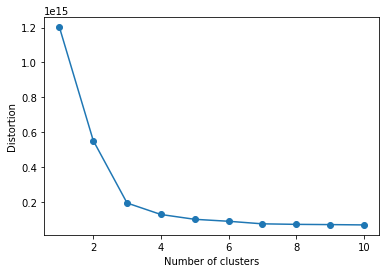

In [7]:
distortions = []
for i in range(1, 11):
    print(i)
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(hotel_clustering)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

We can see in the resulting plot that the turning point is at k = 3, which means k = 3 is a good choice for the kmeans algorithm. 